In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [2]:
import matplotlib.pyplot as plt

In [3]:
(ds_train, ds_test), ds_info = tfds.load('mnist',split=['train', 'test'],
                                        shuffle_files = True,
                                        as_supervised = False,
                                        with_info=True)

In [4]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Predator\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

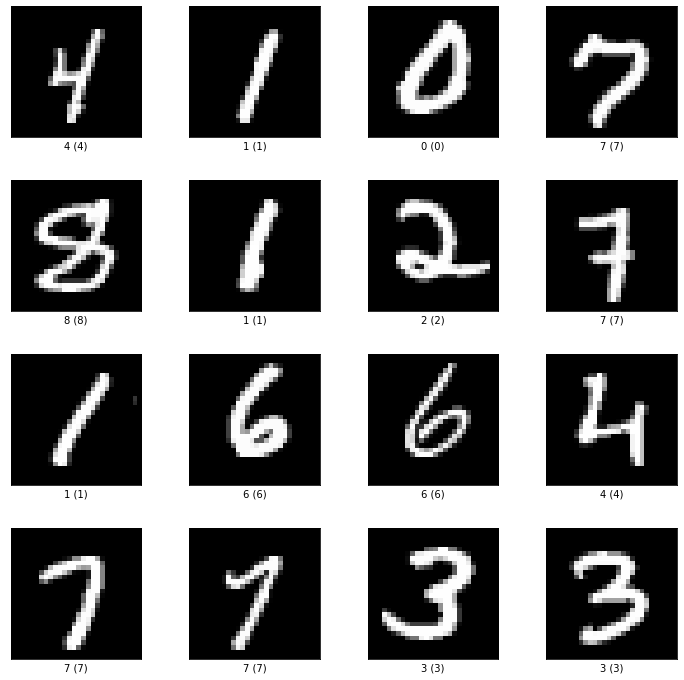

In [5]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)

In [10]:
def normalize_img(image, label):
    """Normalizes images"""
    return tf.cast(image, tf.float32) / 255.0, label

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(buffer_size=1000)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_trian.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(AUTOTUNE)

model = keras.Sequential([
    keras.Input((28,28,1),
               layers.Conv2D(32,3,activation='relu'),
               layers.Flatten(),
               layers.Dense(10),)
])

model.compile(
    optimizer = keras.optimizers.Adam(lr=0.001),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

model.fit(ds_train, epochs=5)
model.evaluate(ds_test)

TypeError: in user code:


    TypeError: tf__normalize_img() missing 1 required positional argument: 'label'
